In [530]:
pip install ipynb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [531]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


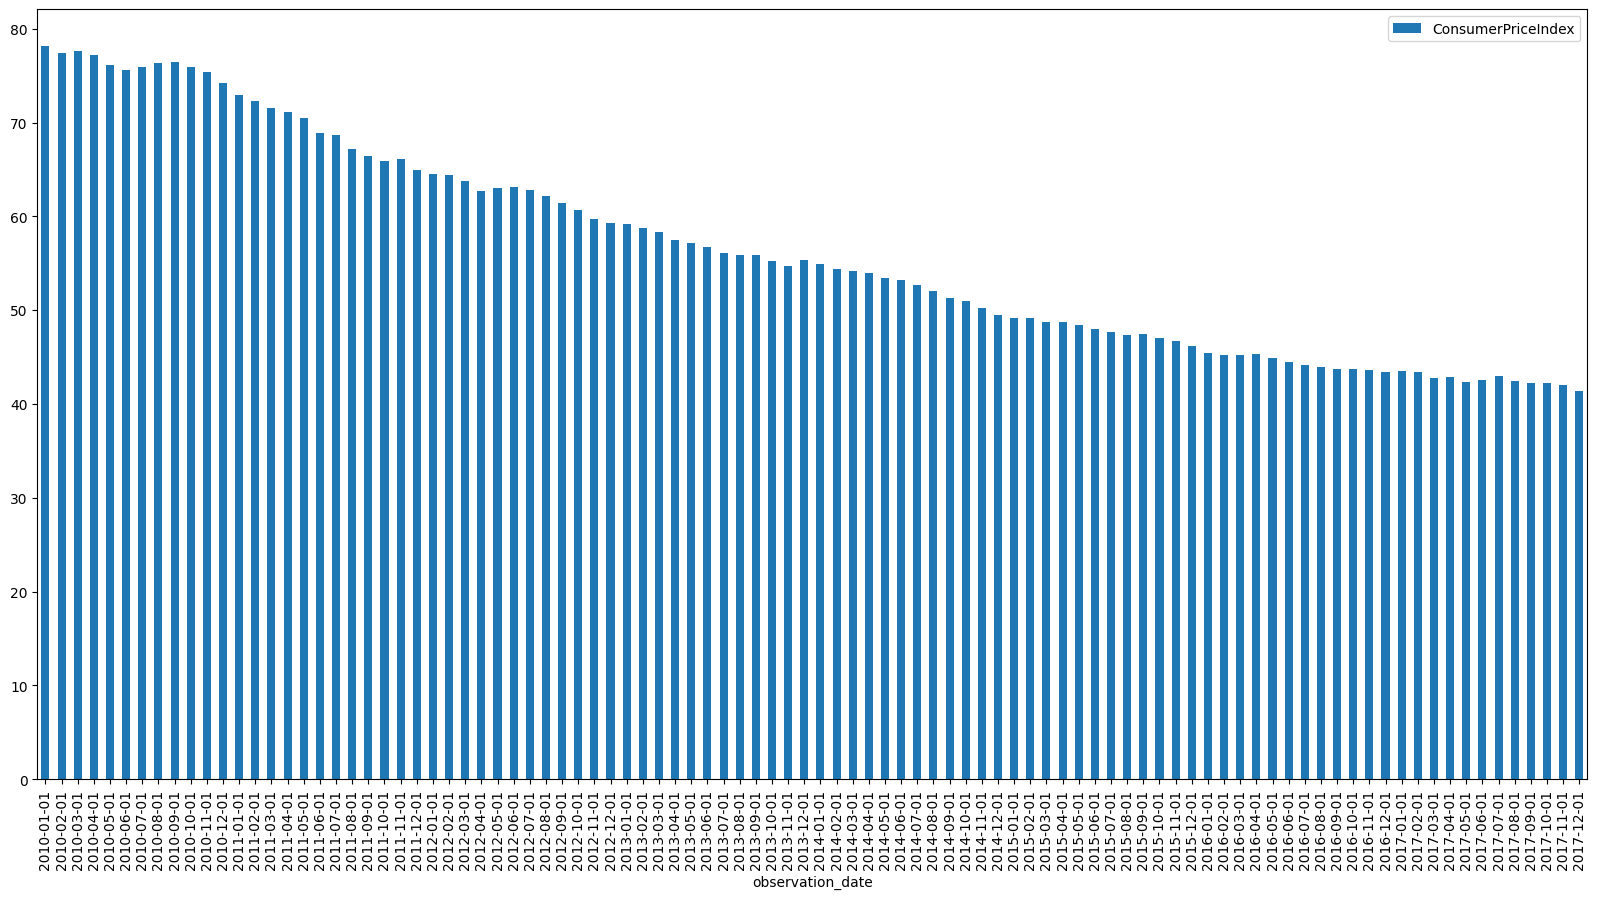

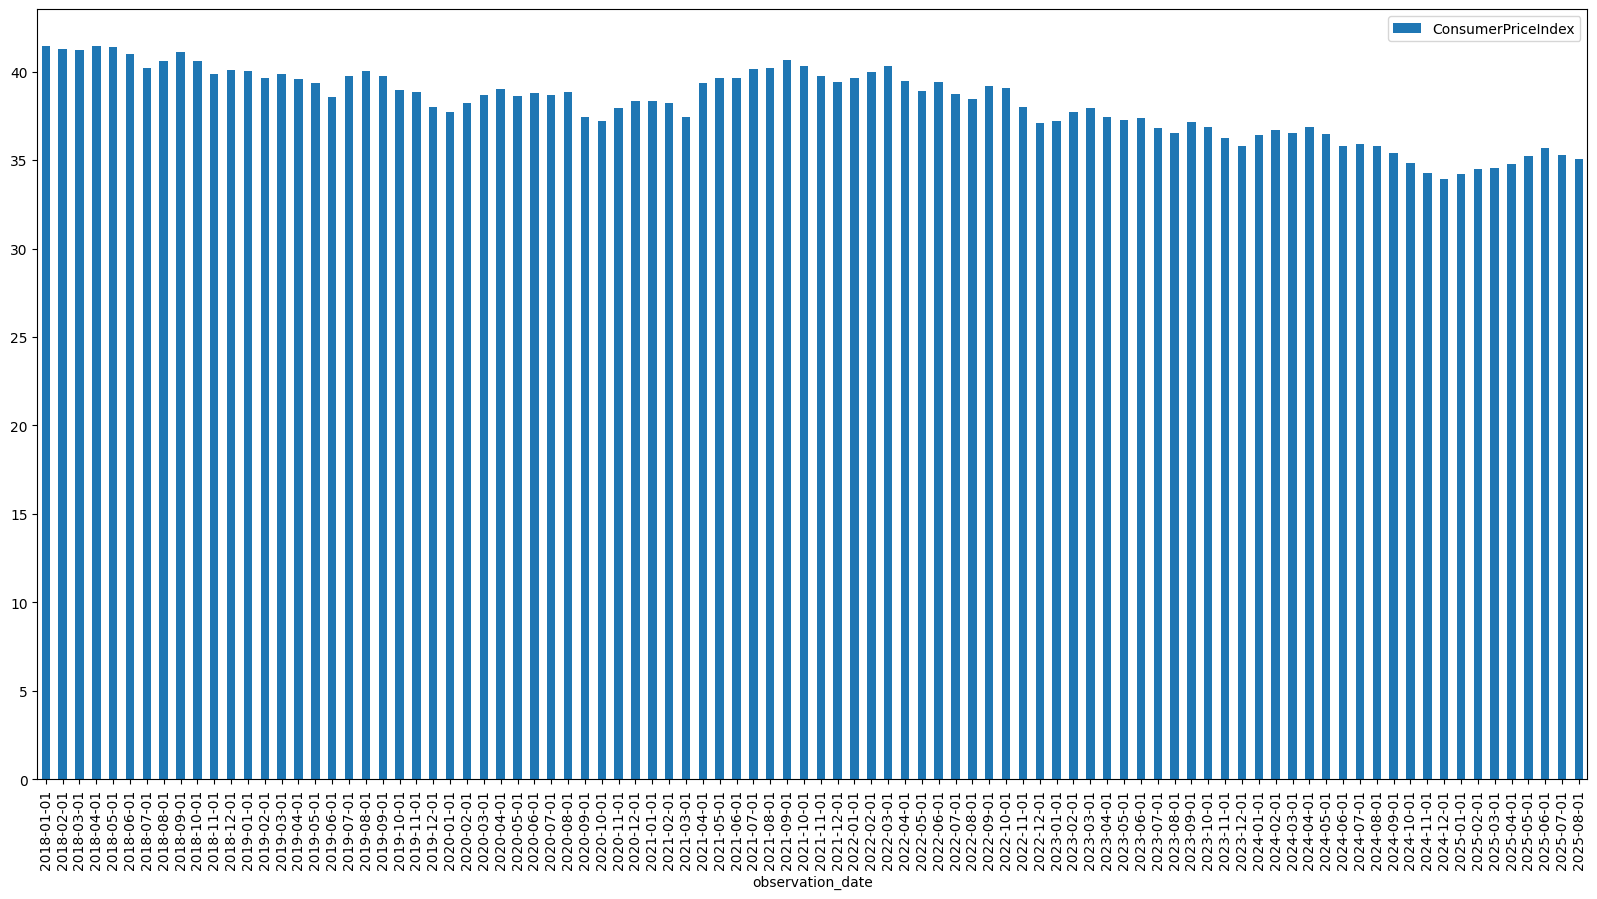

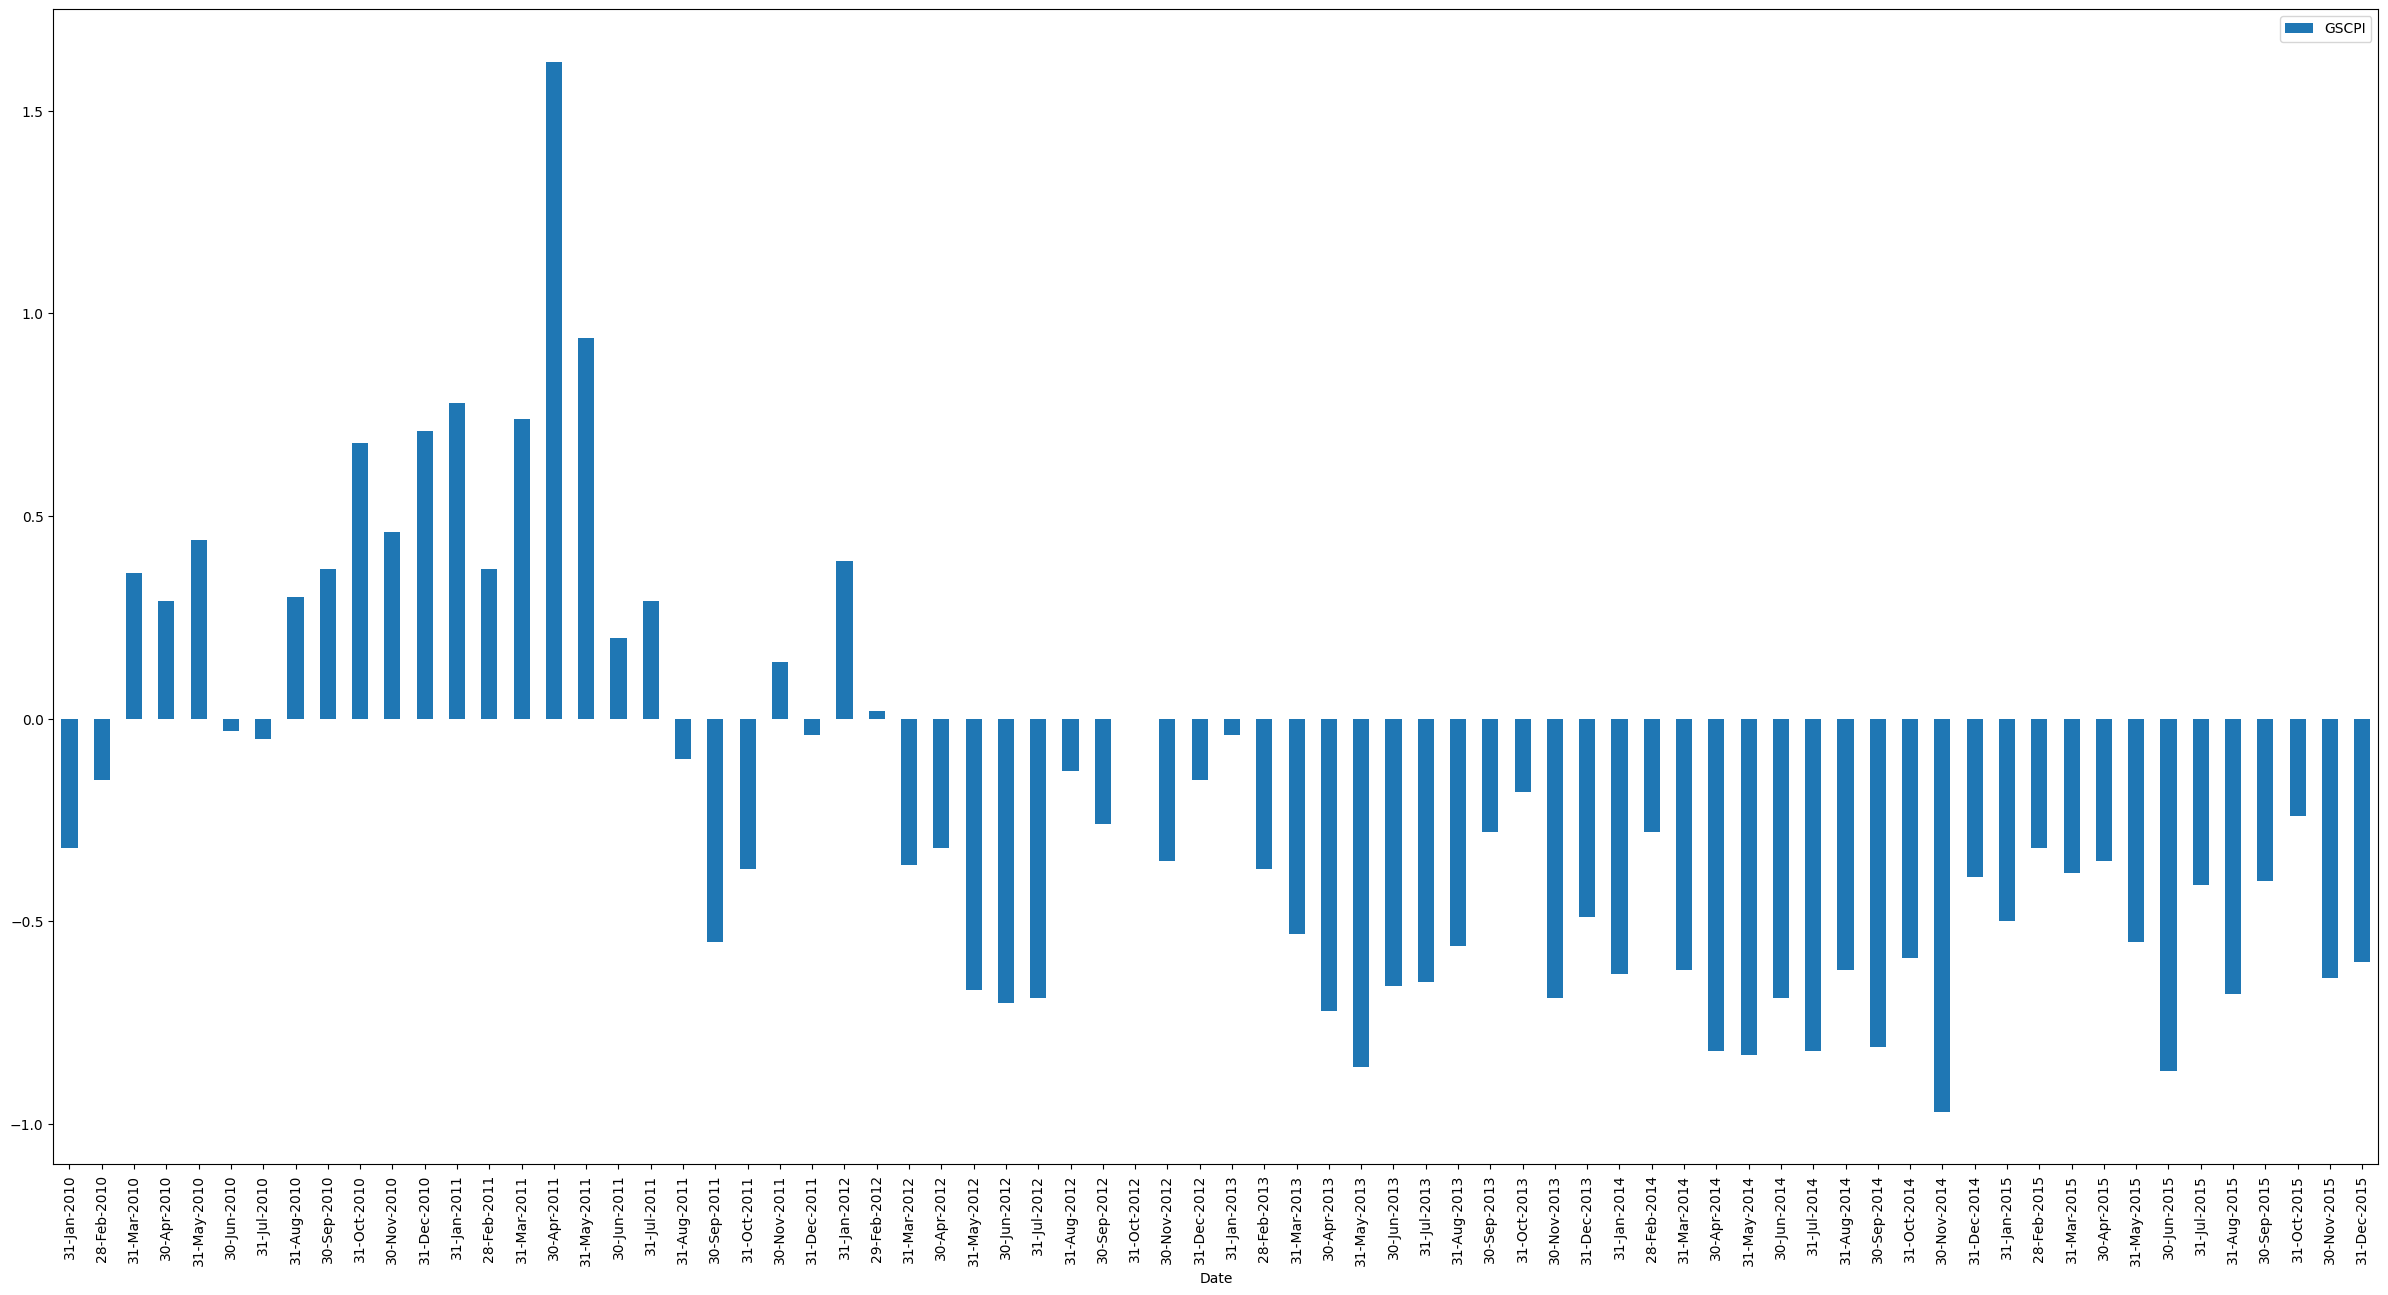

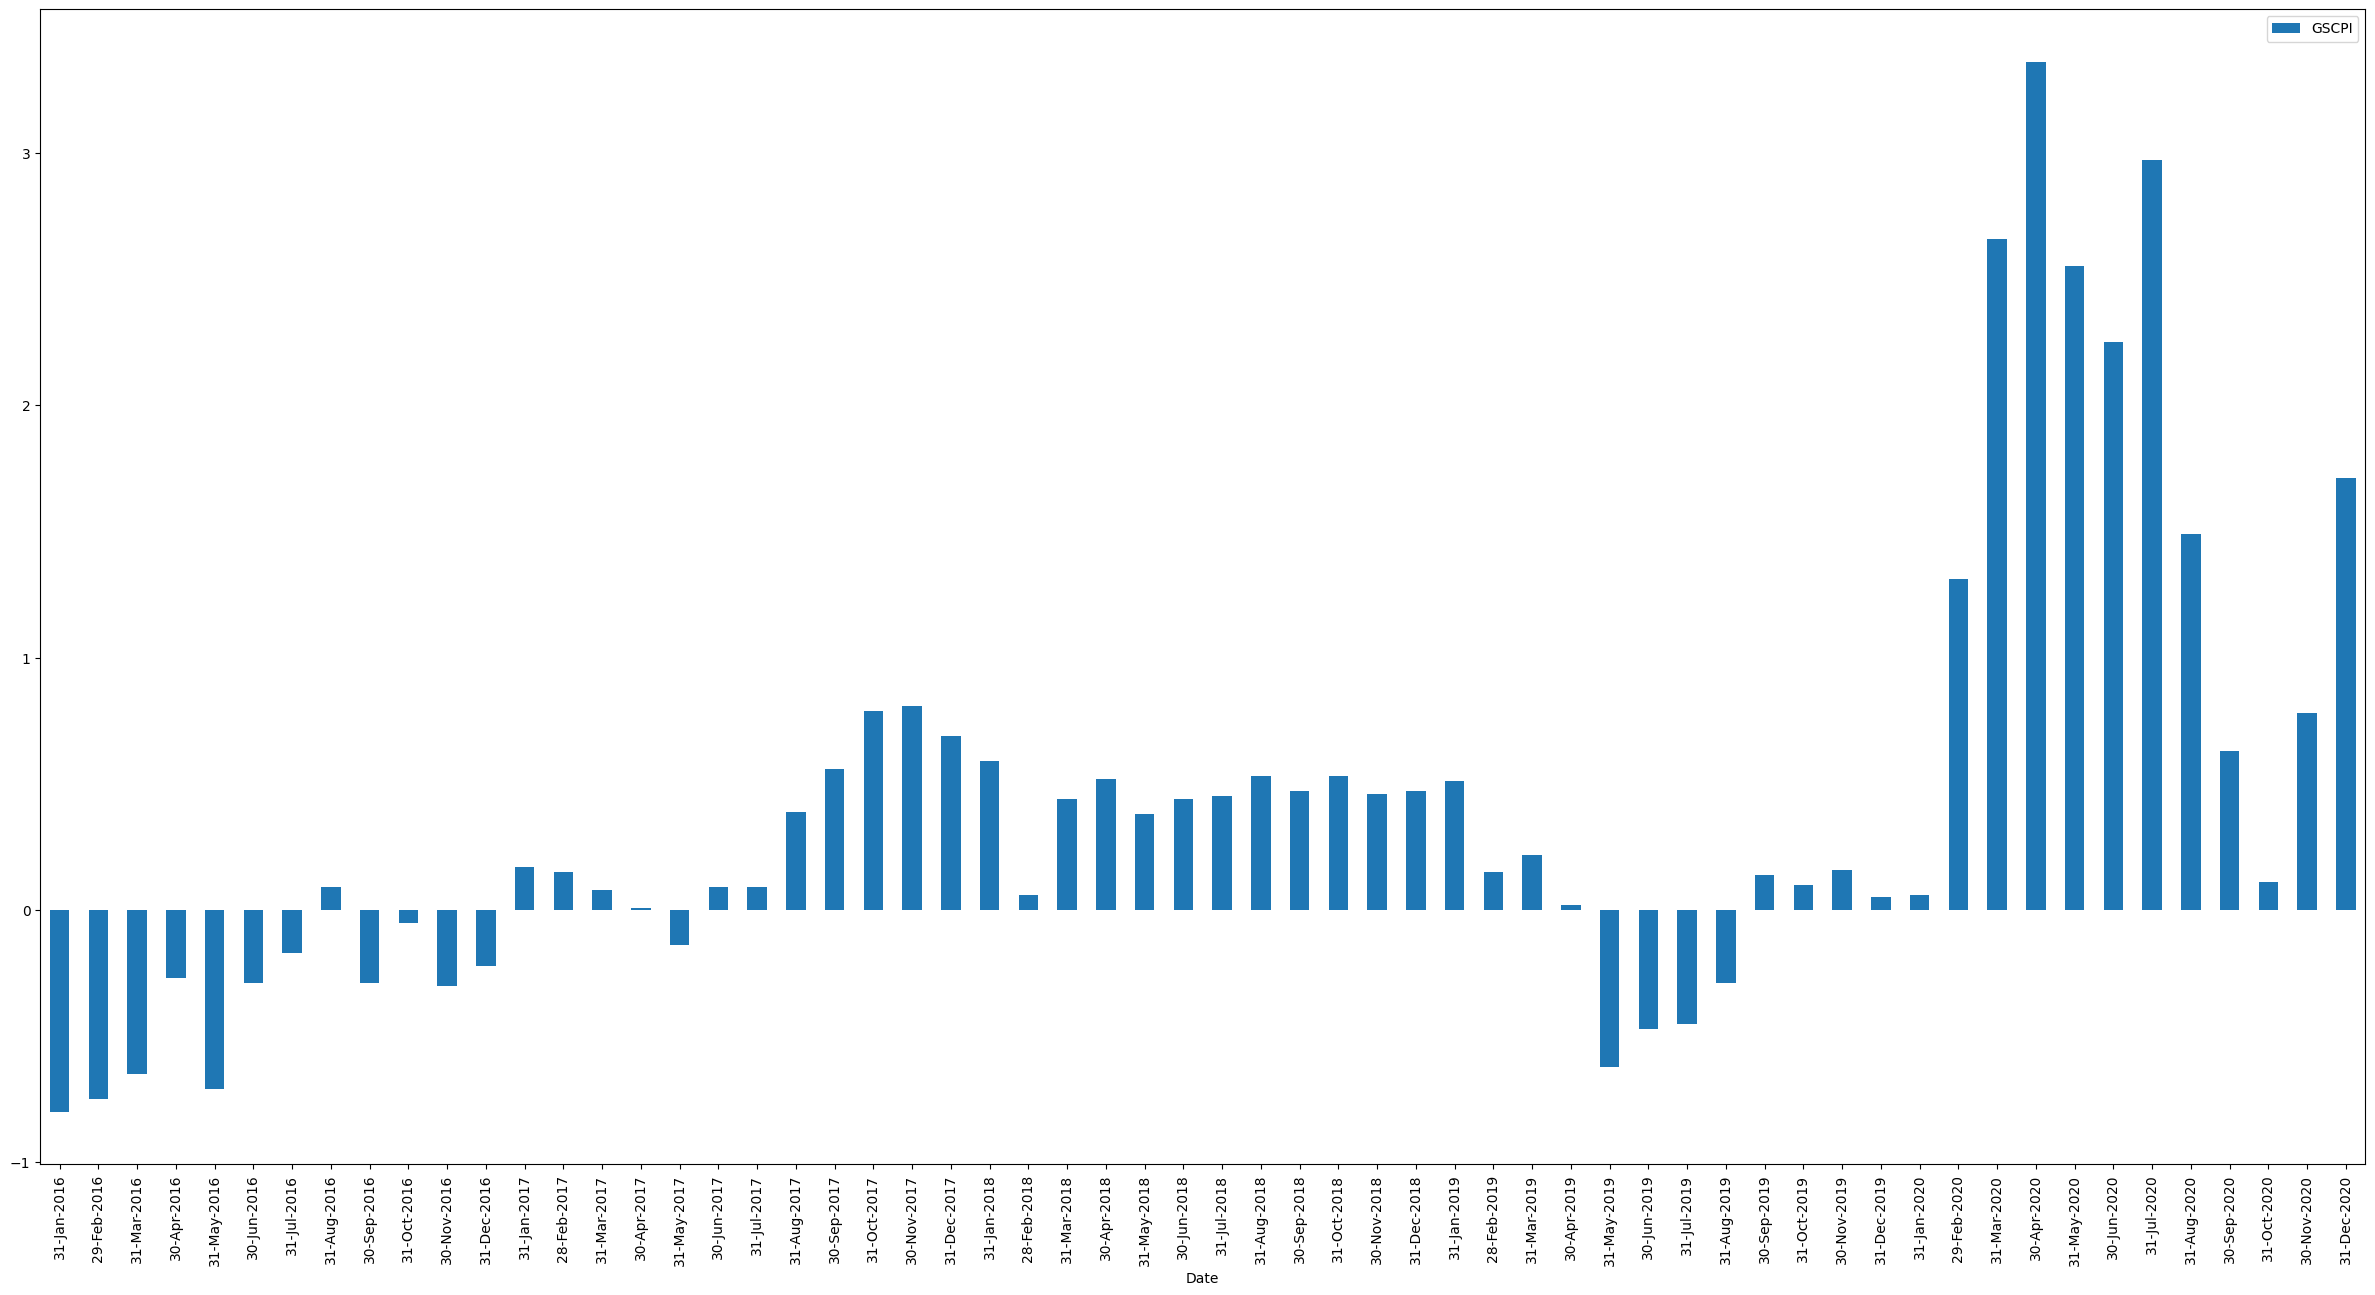

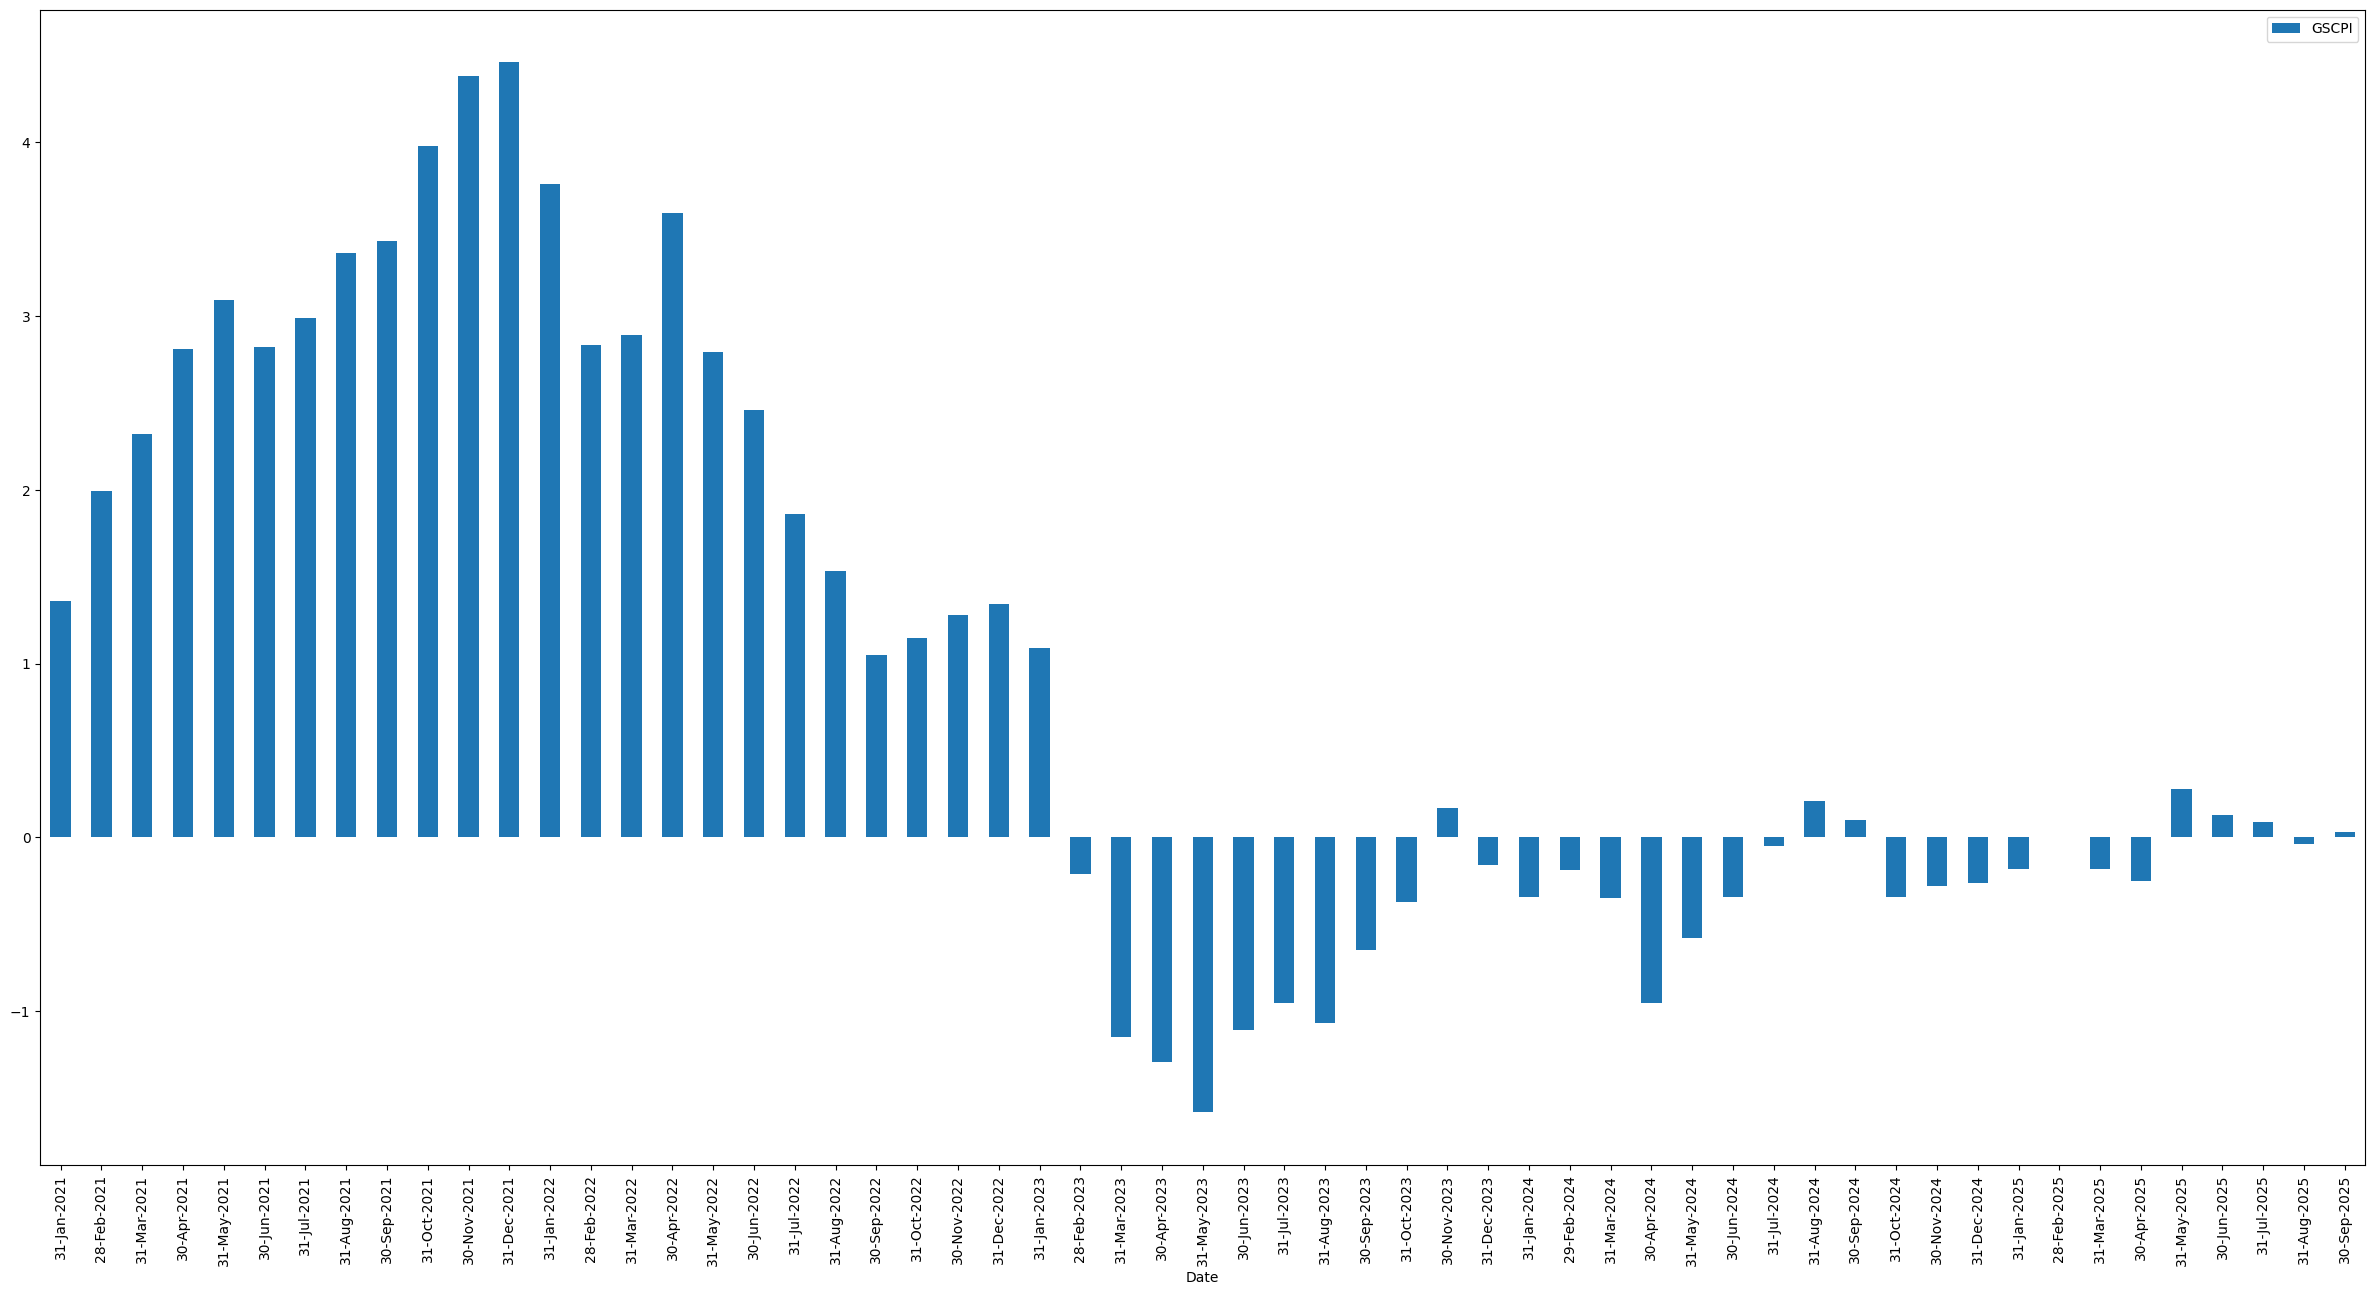

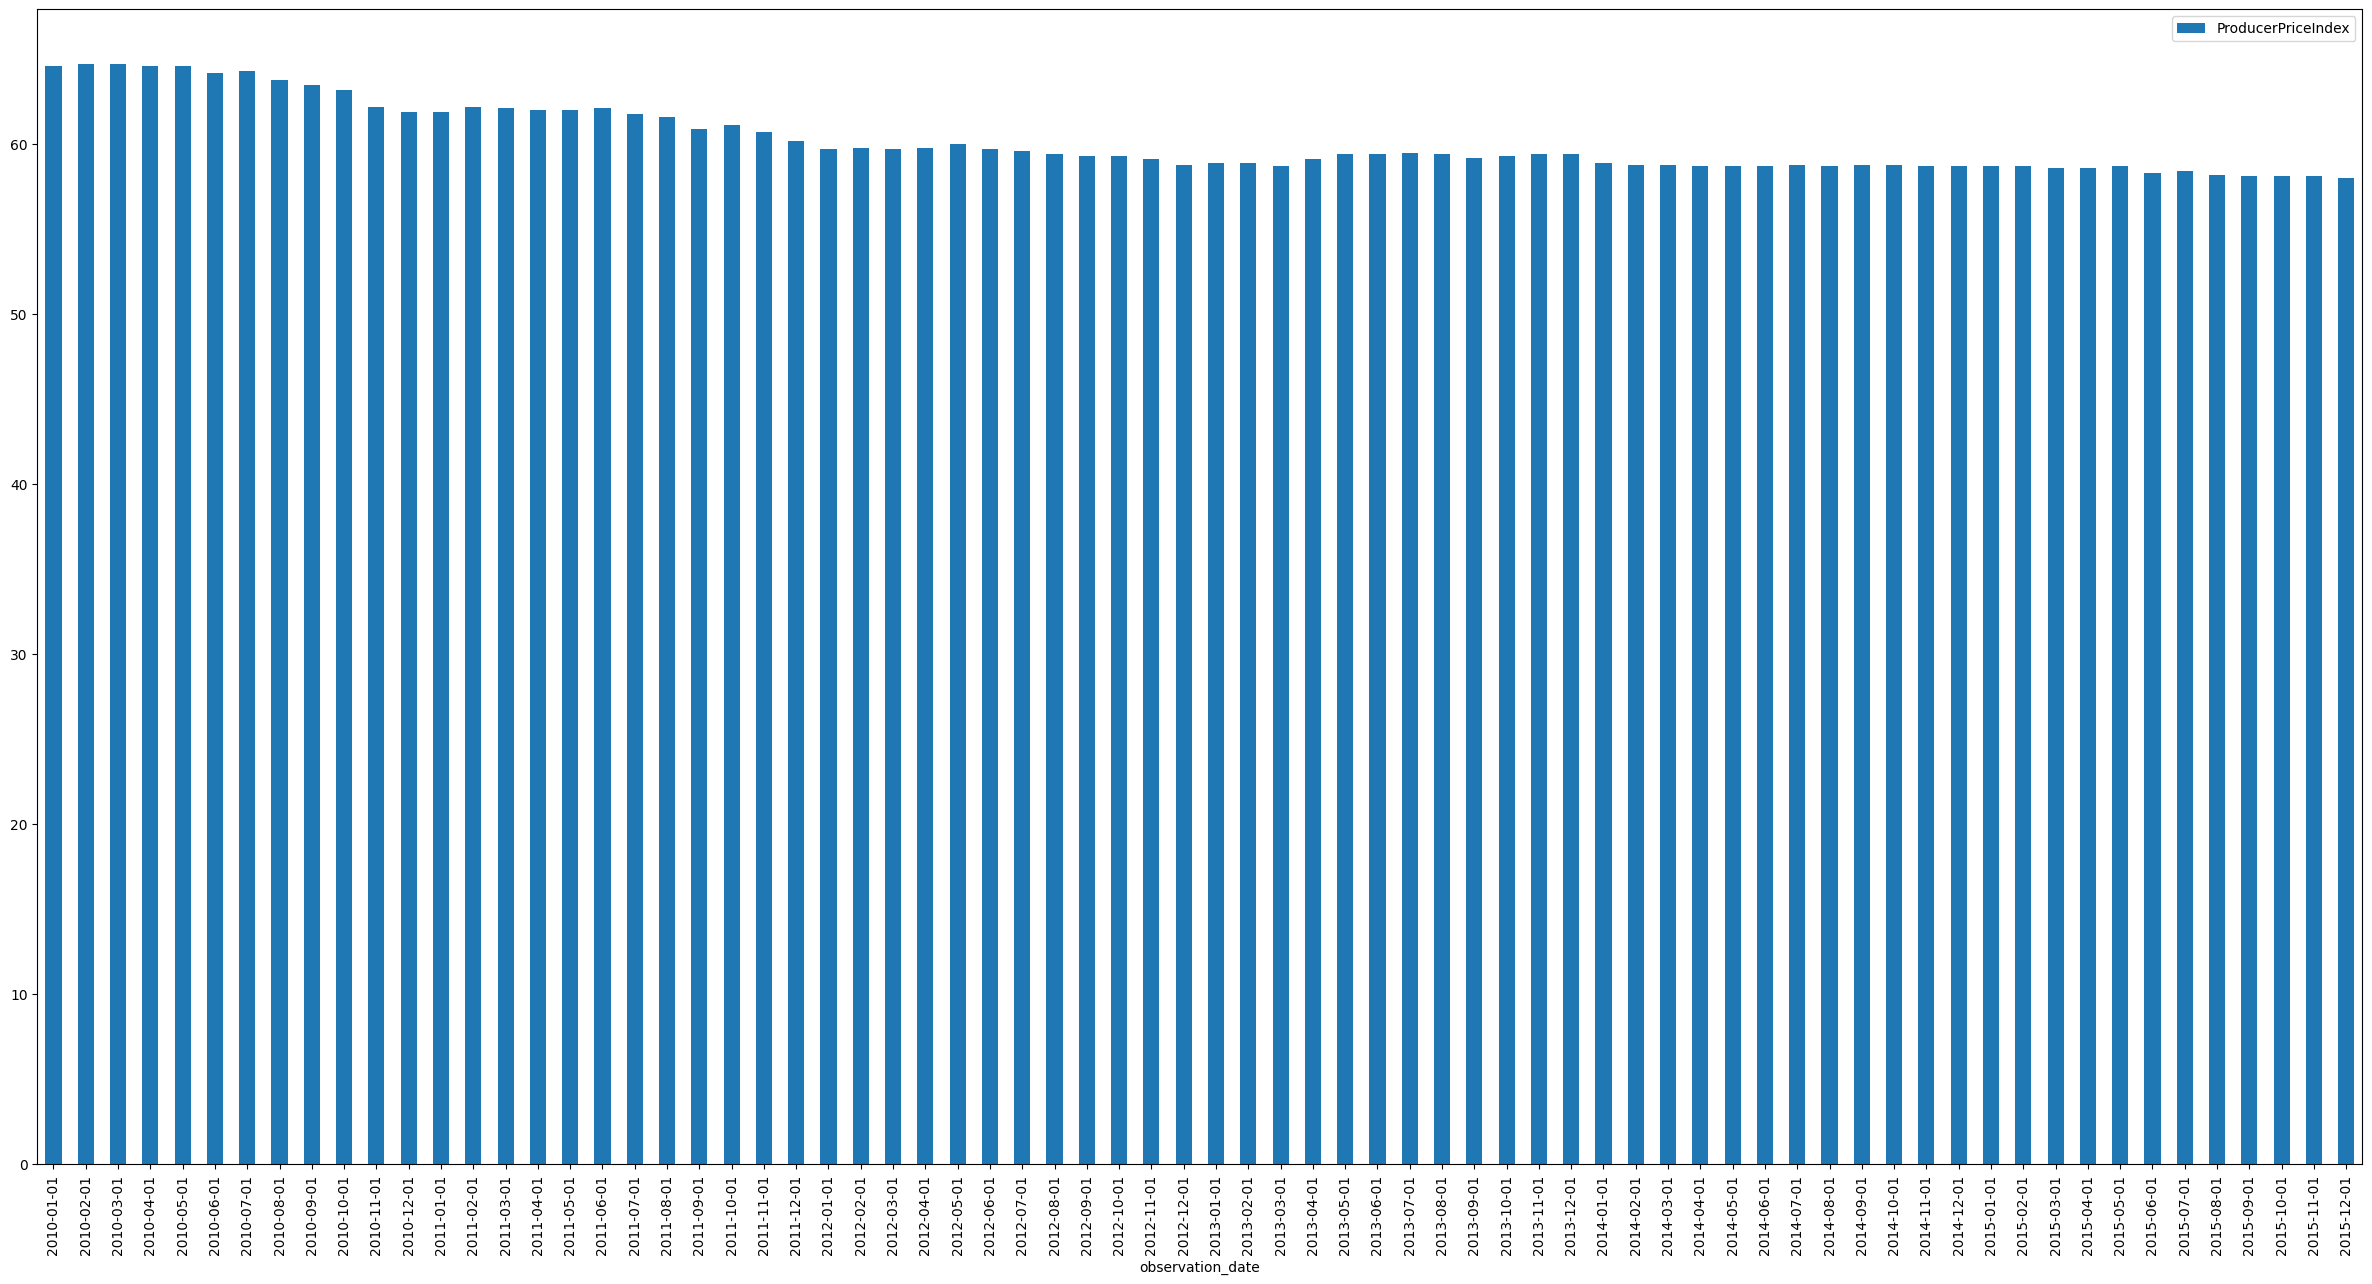

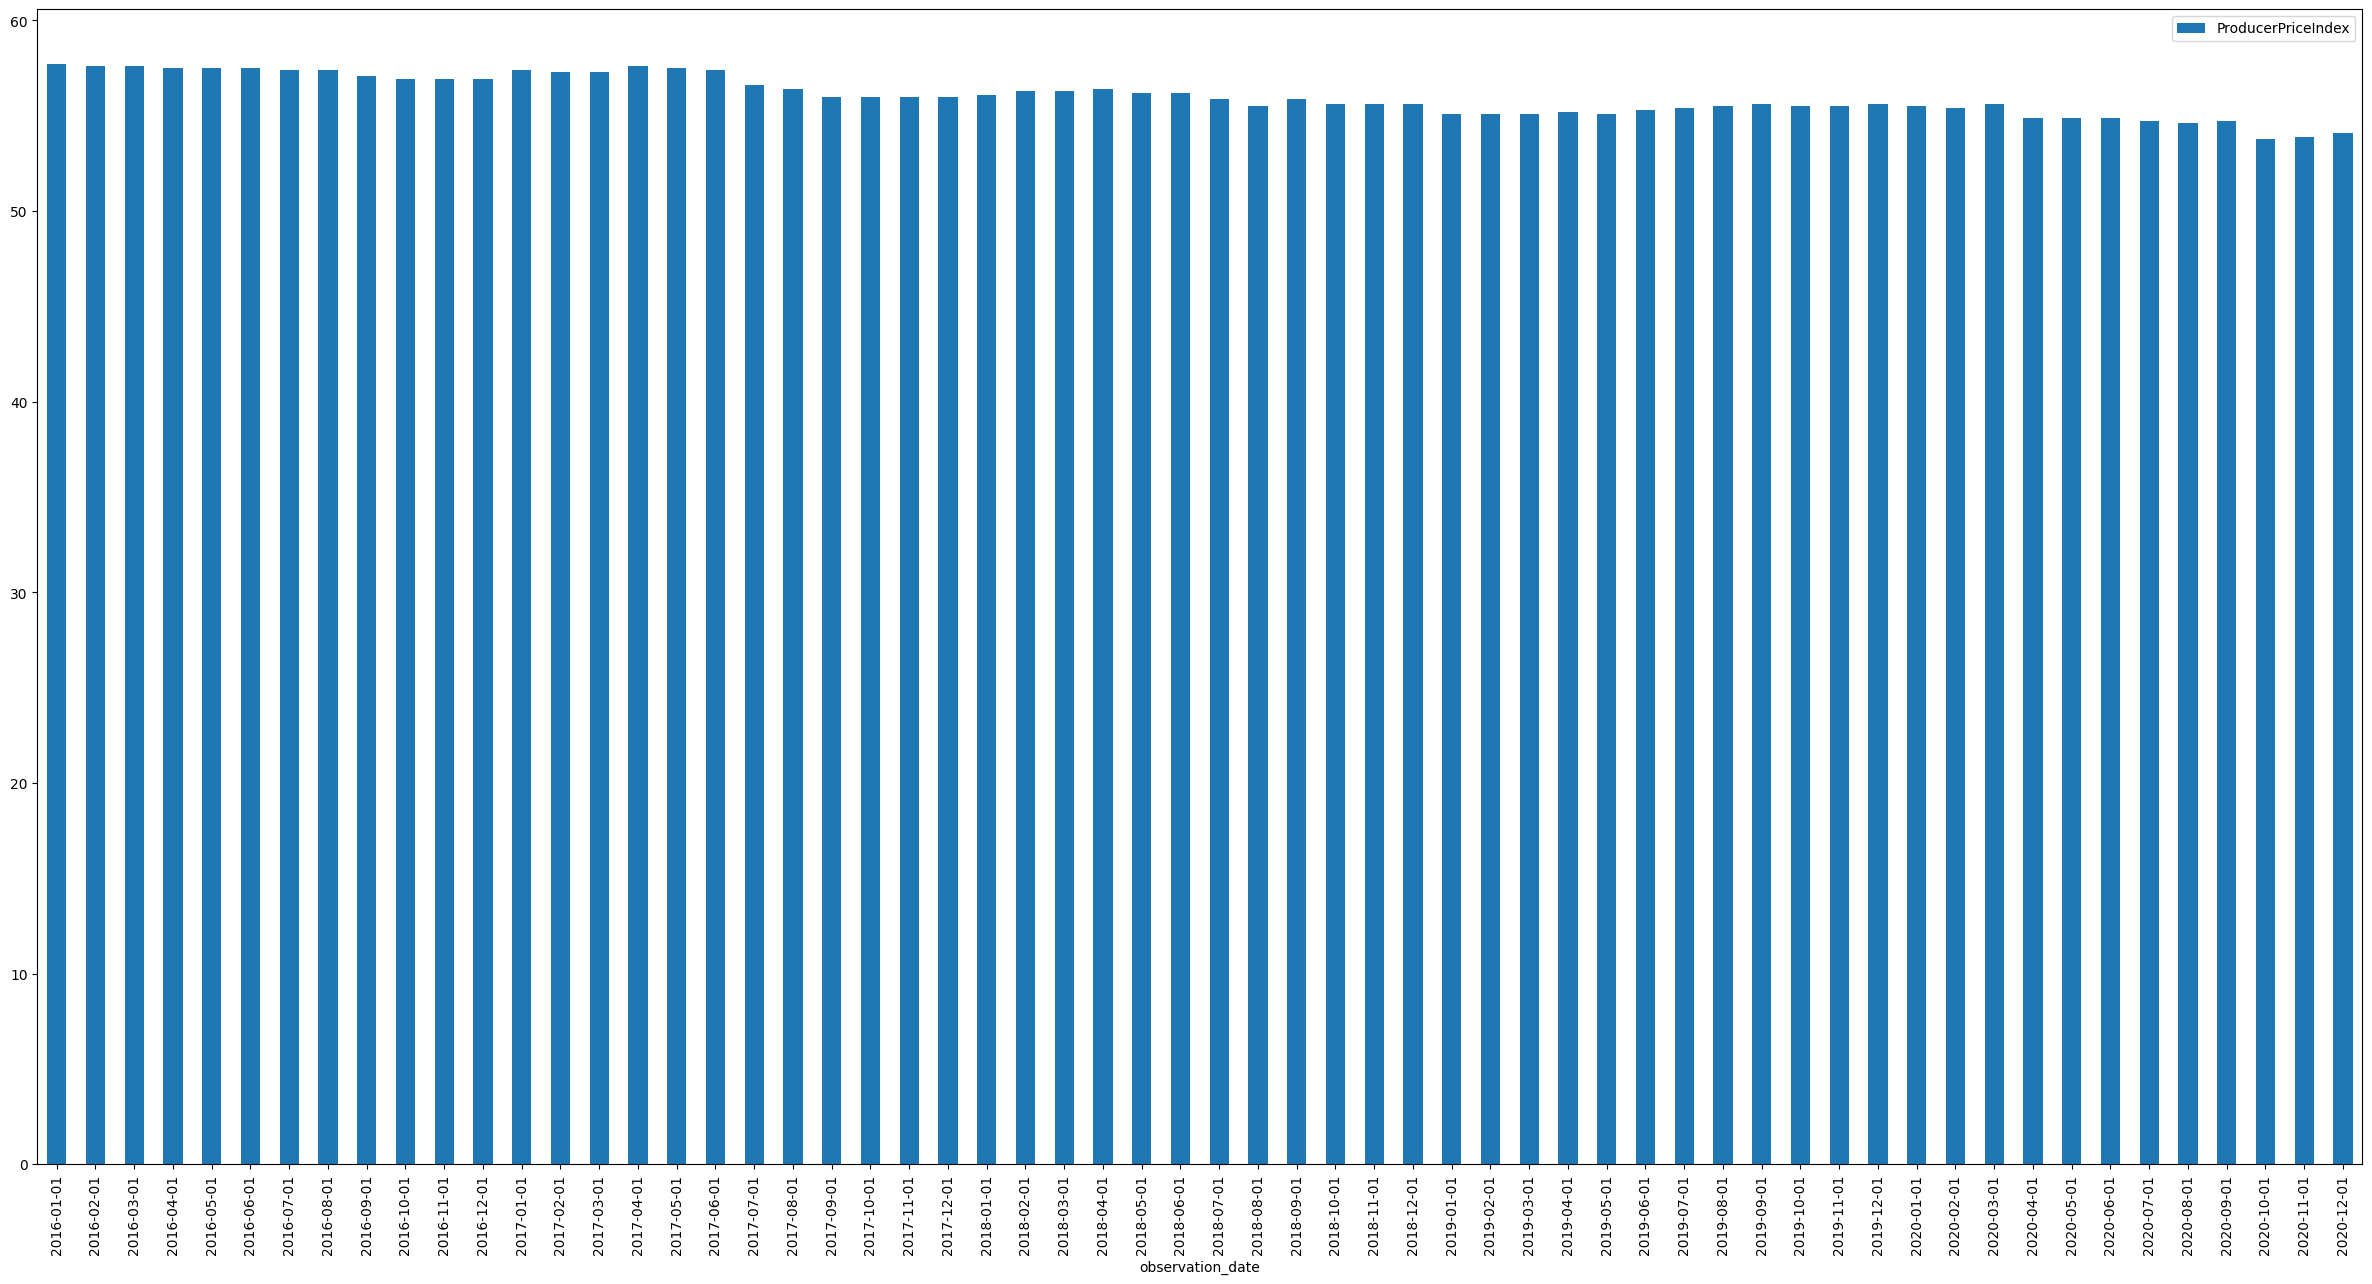

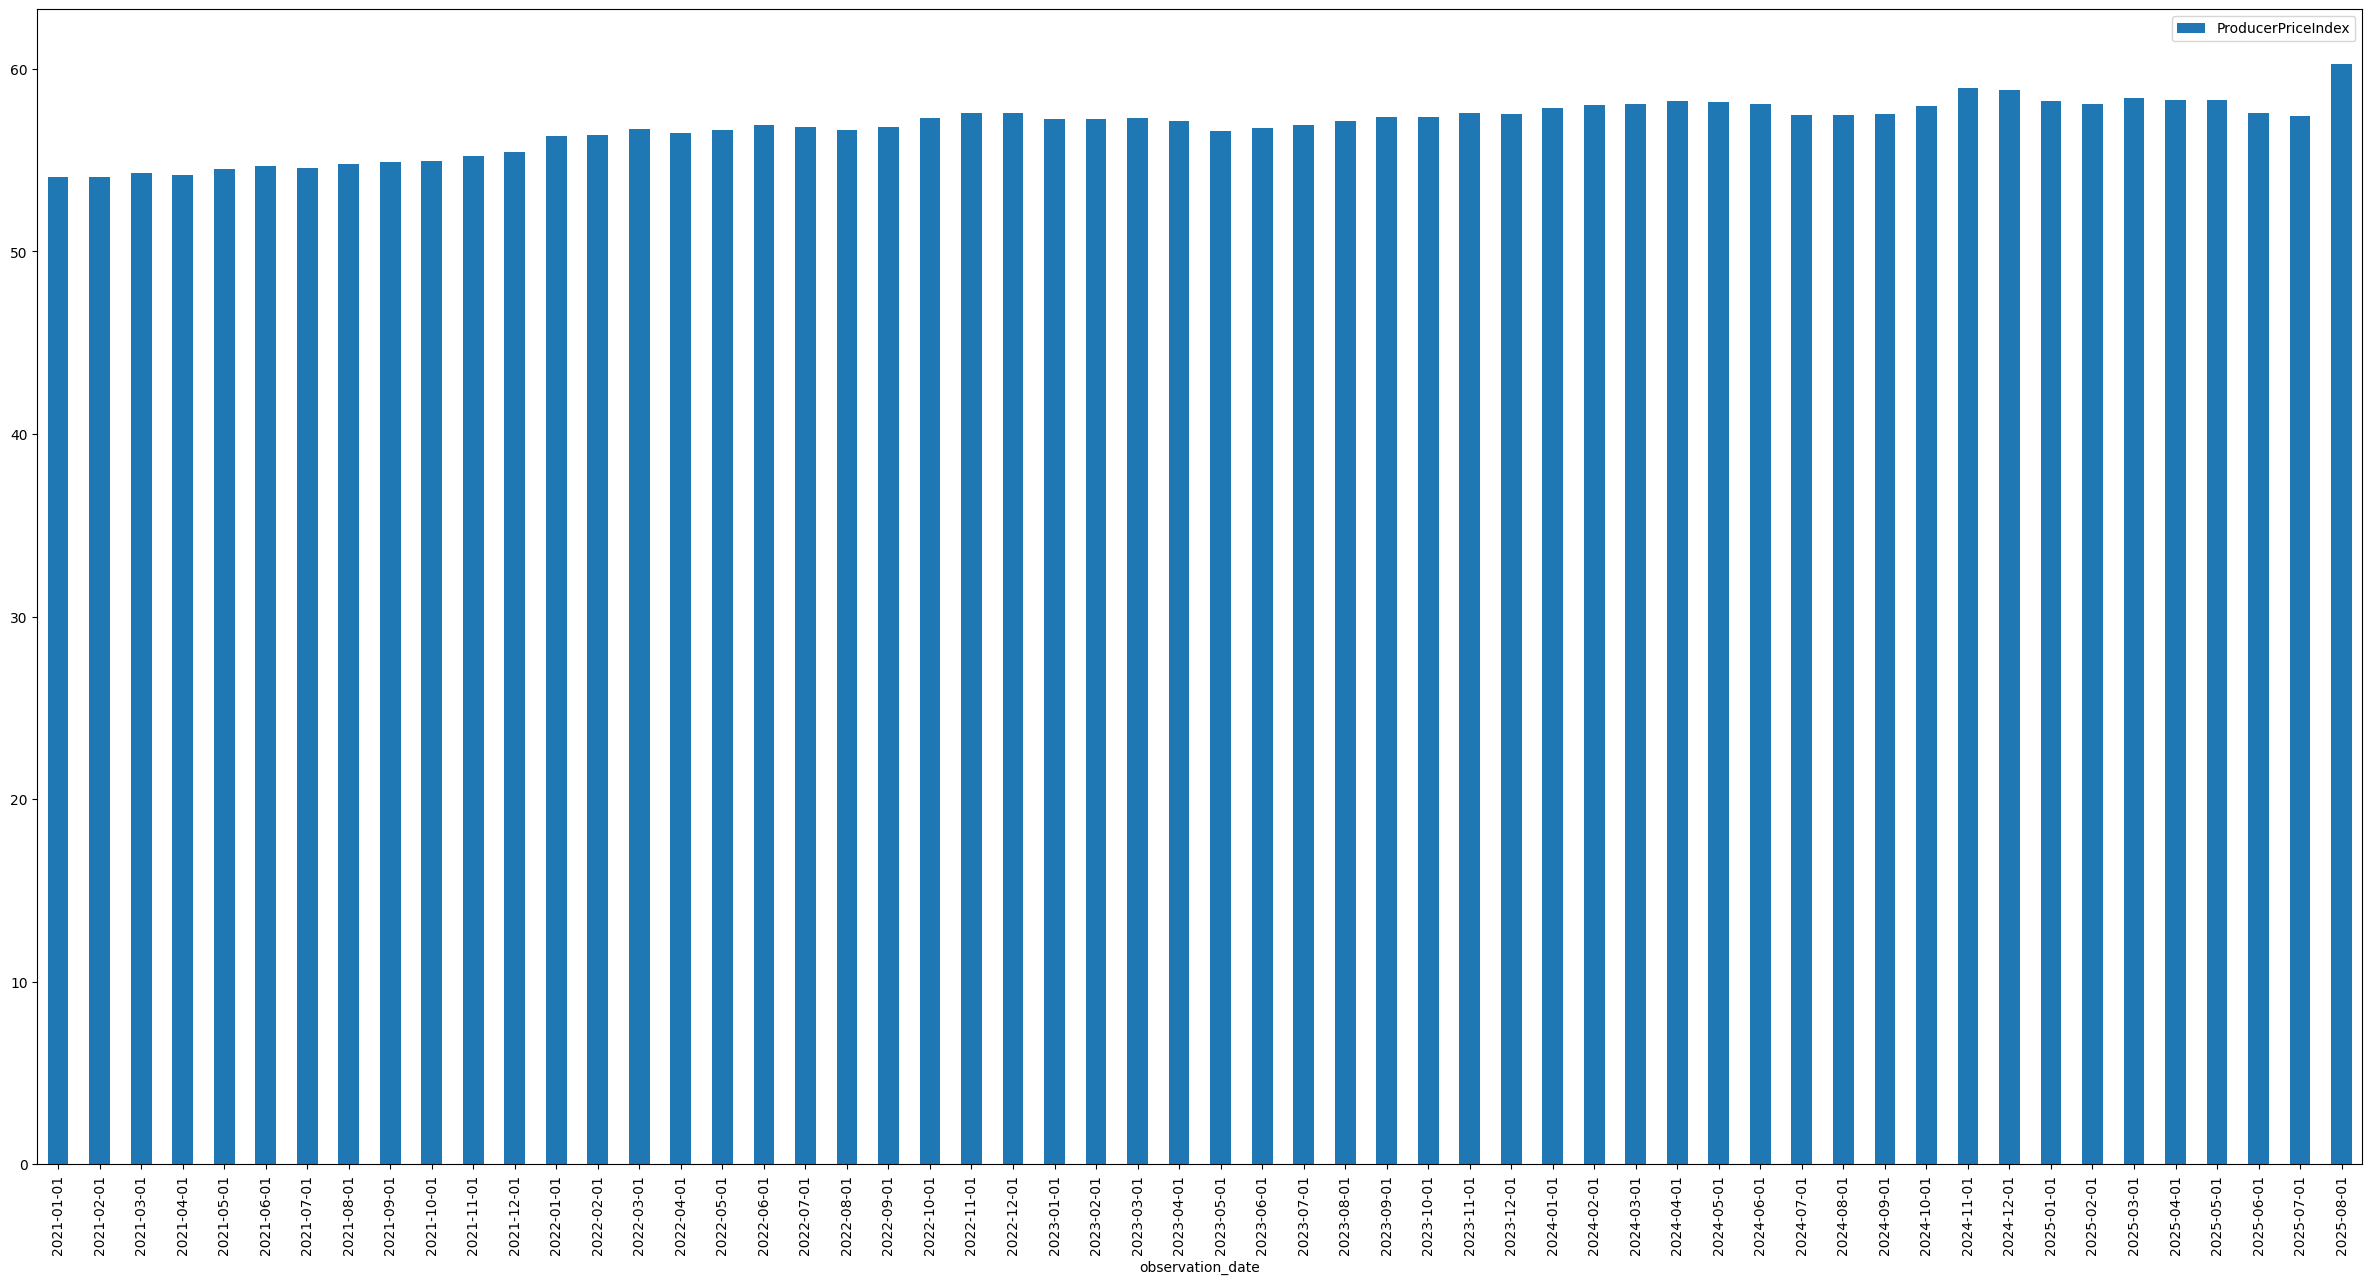

In [532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
%run ./CPI.ipynb
%run ./GSCPI.ipynb
%run ./PPI.ipynb

In [533]:
df_C = df_cpi = pd.read_csv("ConsumerPriceIndexforallUrbanConsumers.csv")
df_C.dropna()
df_C.reset_index(drop = True, inplace = True)
df_C.rename(columns={'CUSR0000SEEE01': 'ConsumerPriceIndex'}, inplace=True) 
df_C

,observation_date,ConsumerPriceIndex
0,2010-01-01,78.180
1,2010-02-01,77.450
2,2010-03-01,77.649
3,2010-04-01,77.154
4,2010-05-01,76.192
...,...,...
183,2025-04-01,34.805
184,2025-05-01,35.202
185,2025-06-01,35.685
186,2025-07-01,35.273


In [534]:
df_1= pd.read_csv("gscpi_data 2.csv")
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10"]
df_globalsupplychain = df_1.drop(columns_to_drop, axis = 1)
df_gscpi = df_globalsupplychain.dropna()
df_gscpi.reset_index(drop = True, inplace = True)

df_new = filterDate_GSCPI(2010)
num = 2011
for i in range(15):
    df2 = filterDate_GSCPI(num)
    df_new = pd.concat([df_new, df2], ignore_index = True)
    num += 1

df_G = df_new
df_G.rename(columns = {"Date" : "observation_date"}, inplace = True)
df_G

,observation_date,GSCPI
0,31-Jan-2010,-0.32
1,28-Feb-2010,-0.15
2,31-Mar-2010,0.36
3,30-Apr-2010,0.29
4,31-May-2010,0.44
...,...,...
184,31-May-2025,0.28
185,30-Jun-2025,0.13
186,31-Jul-2025,0.09
187,31-Aug-2025,-0.04


In [535]:
df_PPI = pd.read_csv("producerPI.csv")
df_PPI.rename(columns={'PCU33443344': 'ProducerPriceIndex'}, inplace=True) 

df_new = filterDate_PPI(2010)
num = 2011
for i in range(15):
    df2 = filterDate_PPI(num)
    df_new = pd.concat([df_new, df2], ignore_index = True)
    num += 1

df_P = df_new
df_P

,observation_date,ProducerPriceIndex
0,2010-01-01,64.600
1,2010-02-01,64.700
2,2010-03-01,64.700
3,2010-04-01,64.600
4,2010-05-01,64.600
...,...,...
183,2025-04-01,58.312
184,2025-05-01,58.318
185,2025-06-01,57.564
186,2025-07-01,57.439


In [536]:
data = []
year = 2010
for i in range(16):
    for i in range(12):
        if i < 9:
            a = "-0" + str(i + 1)
        else:
            a = "-" + str(i + 1)
        date = str(year) + a
        d = {"observation_date" : date}
        data.append(d)
    year +=1

df_Date = pd.DataFrame(data)
df_Date['observation_date'] = pd.to_datetime(df_Date['observation_date'])
df_Date['observation_date'] = df_Date['observation_date'].dt.strftime('%Y%m')
df_Date['observation_date'] = df_Date['observation_date'].astype(int)
df_Date

,observation_date
0,201001
1,201002
2,201003
3,201004
4,201005
...,...
187,202508
188,202509
189,202510
190,202511


In [537]:
df = df_Date
df["GSCPI"] = df_G["GSCPI"]
df["PPI"] = df_P.ProducerPriceIndex
df["CPI"] = df_C.ConsumerPriceIndex
df.dropna()
df

,observation_date,GSCPI,PPI,CPI
0,201001,-0.32,64.600,78.180
1,201002,-0.15,64.700,77.450
2,201003,0.36,64.700,77.649
3,201004,0.29,64.600,77.154
4,201005,0.44,64.600,76.192
...,...,...,...,...
187,202508,-0.04,60.247,35.064
188,202509,0.03,NaN,NaN
189,202510,NaN,NaN,NaN
190,202511,NaN,NaN,NaN


In [538]:
df.corr(numeric_only = True)
df["GSCPI"].corr(df["CPI"].shift(-3))
print(df.shape)

(192, 4)


In [539]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(method='ffill').fillna(method='bfill')
df = df.fillna(method='ffill').fillna(method='bfill')

/var/folders/zq/rpxyqyh56yn_63_5vr7vklw00000gn/T/ipykernel_98832/3046668173.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
/var/folders/zq/rpxyqyh56yn_63_5vr7vklw00000gn/T/ipykernel_98832/3046668173.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


In [540]:
print(df.shape)

(192, 4)


In [541]:
# Use final N months as a holdout for evaluation (e.g. last 12 months)
# splitting your time series into a training set and a testing (validation) set,
# which is essential for evaluating how well your prediction model works.
forecast_steps = 12
train = df.iloc[:-forecast_steps]
test  = df.iloc[-forecast_steps:]

In [542]:
# Separate endogenous (y) and exogenous (X)
y_train = train['CPI']
X_train = train[['PPI', 'GSCPI']]
y_test = test['CPI']
X_test = test[['PPI', 'GSCPI']]

In [543]:
#Checkpoint
print("Train rows:", len(train))
print("Test rows:", len(test))
print("Target (y) rows:", len(y_train))
print("Exogenous (X) rows:", len(X_train))

Train rows: 180
Test rows: 12
Target (y) rows: 180
Exogenous (X) rows: 180


In [544]:
print(len(y_train), len(X_train))

180 180


In [545]:
# Confirm clean
assert not np.any(np.isnan(df.values)), "Data still has NaNs"
assert not np.any(np.isinf(df.values)), "Data still has infs"

In [546]:
# Fitting the SARIMAX model
order = (1, 1, 1)
model = SARIMAX(y_train, exog = X_train, order = order, enforce_stationarity = False, enforce_invertibility = False)
fit = model.fit(disp=False)
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                  180
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -112.404
Date:                Wed, 12 Nov 2025   AIC                            234.809
Time:                        11:17:17   BIC                            250.690
Sample:                             0   HQIC                           241.249
                                - 180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PPI           -0.0007      0.151     -0.004      0.996      -0.296       0.295
GSCPI          0.1924      0.076      2.538      0.011       0.044       0.341
ar.L1          0.9859      0.004    280.467      0.0

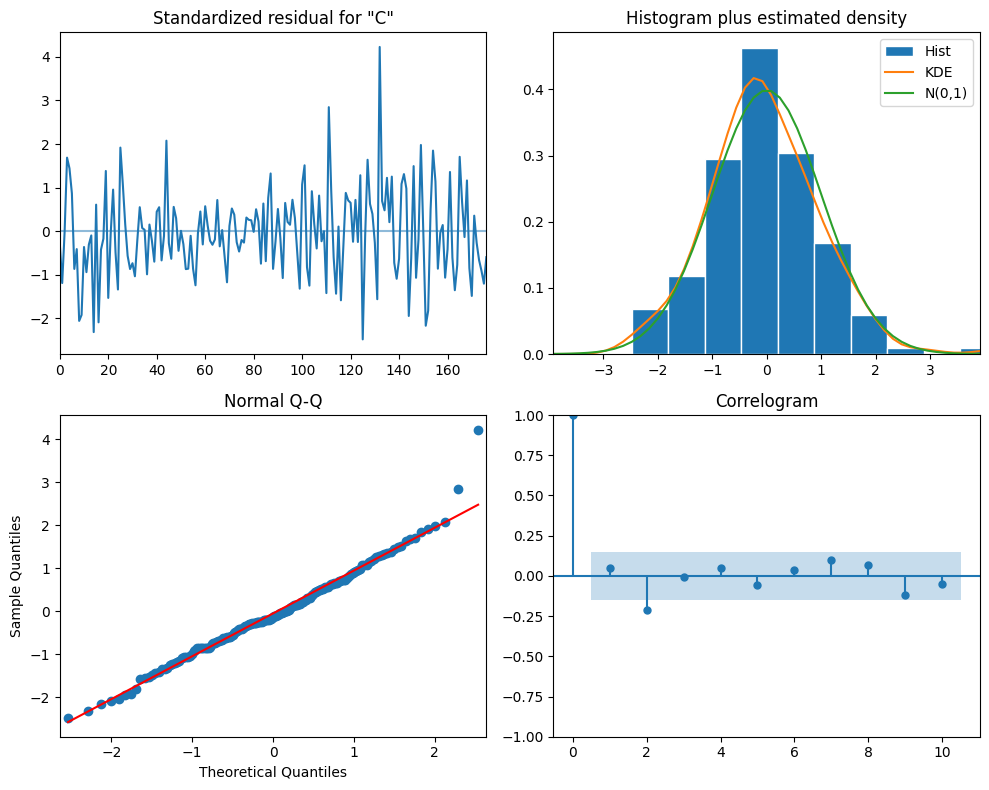

In [547]:
# === 5) Diagnostics (quick) ===
fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

In [548]:
# === 6) Prepare future_inputs (exogenous values for forecast period) ===
future_inputs = X_test  
# if you have real exogenous values for the forecast window

In [549]:
# Ensure shapes align: rows == forecast_steps and columns match
print("future_inputs shape:", future_inputs.shape, "expected:", (forecast_steps, X_train.shape[1]))
assert list(future_inputs.columns) == list(X_train.columns), "Exog column mismatch"

future_inputs shape: (12, 2) expected: (12, 2)


In [550]:
# === 7) Forecast using model.predict or get_forecast ===
start = len(y_train)
end = start + forecast_steps - 1

In [551]:
# Use predict (returns point forecasts)
pred = fit.predict(start=start, end=end, exog=future_inputs)
# align index for plotting
pred.index = future_inputs.index  

In [552]:
# Or, get_forecast to obtain confidence intervals
forecast_res = fit.get_forecast(steps = forecast_steps, exog = future_inputs)
pred_mean = forecast_res.predicted_mean
pred_cpi = forecast_res.conf_int(alpha=0.05)
pred_mean.index = future_inputs.index
pred_cpi.index = future_inputs.index

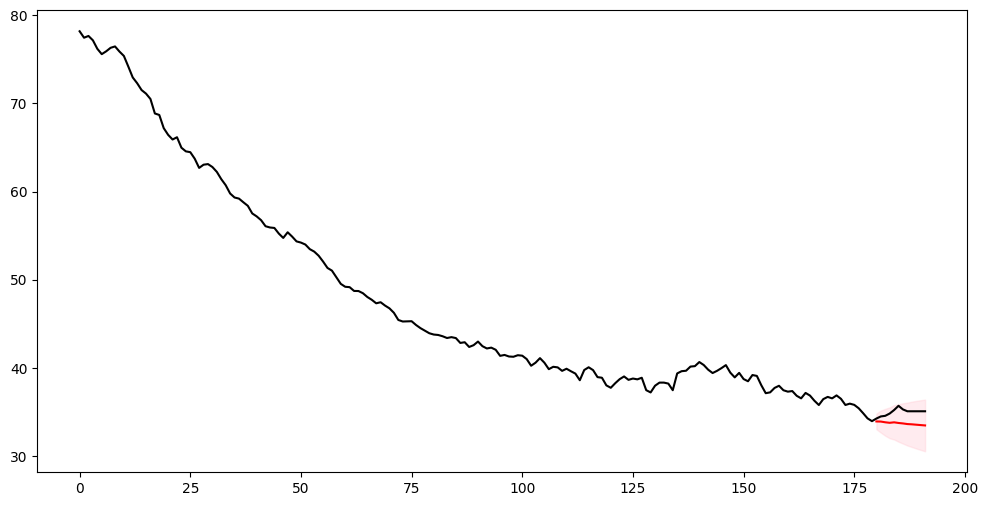

In [553]:
# === 8) Evaluate / Plot results ===
plt.figure(figsize = (12,6))
plt.plot(df.index, df['CPI'], label='Observed CPI', color='black')
plt.plot(pred_mean.index, pred_mean, label='Forecast (SARIMAX)', color='red')
plt.fill_between(pred_cpi.index, pred_cpi.iloc[:,0], pred_cpi.iloc[:,1], color = 'pink', alpha = 0.3, label = '95% CI')

In [554]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [555]:
df['PPI'].fillna(df['PPI'].mean(), inplace=True)
df['GSCPI'].fillna(df['GSCPI'].mean(), inplace=True)
df['CPI'].fillna(df['CPI'].mean(), inplace=True)

/var/folders/zq/rpxyqyh56yn_63_5vr7vklw00000gn/T/ipykernel_98832/1574590589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PPI'].fillna(df['PPI'].mean(), inplace=True)
/var/folders/zq/rpxyqyh56yn_63_5vr7vklw00000gn/T/ipykernel_98832/1574590589.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [556]:
future_inputs = df
future_inputs.drop(["CPI", "observation_date"], axis = 1, inplace = True)

model = SARIMAX(df["CPI"],
                exog = df[["PPI", "GSCPI"]],
                order = (1,1,1))
fit = model.fit()
prediction = fit.get_forecast(steps=6, exog = future_inputs)
prediction.summary_frame()

KeyError: 'CPI'